In [1]:
# ozone.csv를 전처리
# ozone2.csv로 저장
# Ozone 필드의 값이 NA인 레코드들을 평균값으로 입력
# Result 필드를 추가하여 ozone의 평균값 이상이면 1, 미만이면 0으로 저장

import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2892\3128693653.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [2]:
# 오존량 분류를 기준으로 한 평균값들
df.groupby("Result").mean()

,Month,Day,Solar.R,Wind,Temp,Ozone
Result,,,,,,
0,6.972222,15.180556,166.302702,11.270833,72.652778,20.902778
1,7.012346,16.358025,203.379334,8.790123,82.530864,60.938272


<Axes: >

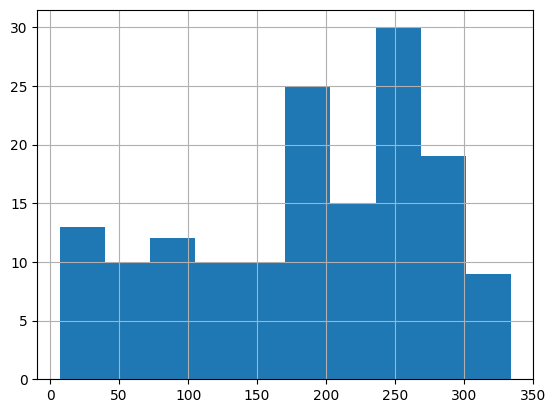

In [3]:
df["Solar.R"].hist()

<Axes: >

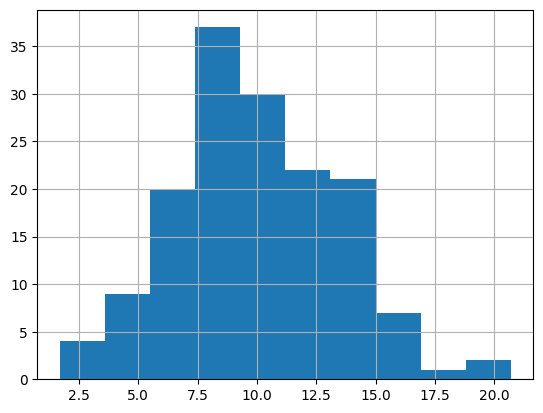

In [5]:
df["Wind"].hist()

<Axes: >

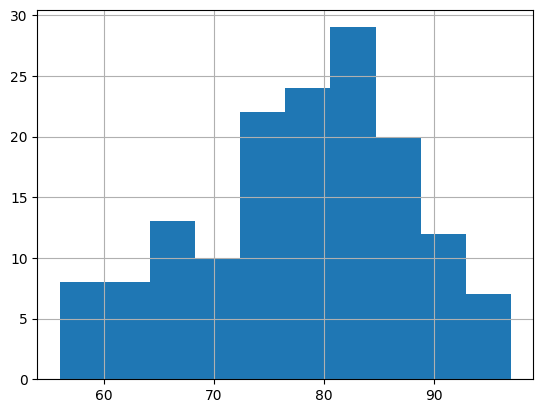

In [6]:
df["Temp"].hist()

In [7]:
df["Result"].value_counts()

Result
1    81
0    72
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_2892\1978812985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Result", data=df, palette=colors)


<Axes: xlabel='Result', ylabel='count'>

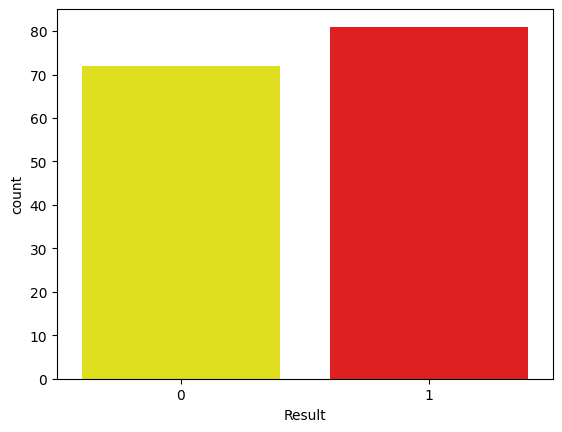

In [9]:
import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x="Result", data=df, palette=colors)
# 불균형 데이터셋

In [10]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

cols = ["Solar.R", "Wind", "Temp"]
X = df[cols]
y = df["Result"]

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Result"])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [12]:
# 오버샘플링
from imblearn.over_sampling import SMOTE

cols = ["Solar.R", "Wind", "Temp"]
X = df[cols]
y = df["Result"]

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Result"])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2["Result"].value_counts()

Result
0    81
1    81
Name: count, dtype: int64

In [13]:
X = X_samp[cols]
y = y_samp["Result"]

In [14]:
import statsmodels.api as sm

# 특정한 변수에서 값의 비율이 너무 낮은 경우 에러가 발생할 수 있음
# model=sm.Logit(y,X,method='bfgs')

model = sm.Logit(y, X)
result = model.fit()

# summary()에 표현되지 않는 값이 있을 경우 summary2() 사용
result.summary2()

Optimization terminated successfully.
         Current function value: 0.578389
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Result           Pseudo R-squared: 0.166     
Date:               2024-03-15 10:01 AIC:              193.3980  
No. Observations:   162              BIC:              202.6608  
Df Model:           2                Log-Likelihood:   -93.699   
Df Residuals:       159              LL-Null:          -112.29   
Converged:          1.0000           LLR p-value:      8.4354e-09
No. Iterations:     5.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0035     0.0021    1.7215   0.0852   -0.0005    0.0076
Wind      -0.2730     0.0538   -5.0734   0.0000   -0.3785   -0.1676
Temp       0.0272     0.0079    3.4355   0.0006    0.0117    0.0427
=================================================================

"""

In [15]:
# pvalue가 0.05보다 큰 값들을 제거
cols = ["Wind", "Temp"]

X = X_samp[cols]
y = y_samp["Result"]

In [16]:
import statsmodels.api as sm

model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.587764
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  162
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.1520
Time:                        10:02:59   Log-Likelihood:                -95.218
converged:                       True   LL-Null:                       -112.29
Covariance Type:            nonrobust   LLR p-value:                 5.118e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Wind          -0.2610      0.052     -4.995      0.000      -0.363      -0.159
Temp           0.0342      0.007      4.951      0.000       0.021       0.048
==============================================================================
"""

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.8217054263565892
검증용:  0.5757575757575758


In [18]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 7,  7],
       [ 7, 12]], dtype=int64)

In [19]:
df_cm=pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,7,7
1,7,12


<Axes: title={'center': 'Confusion Matrix'}>

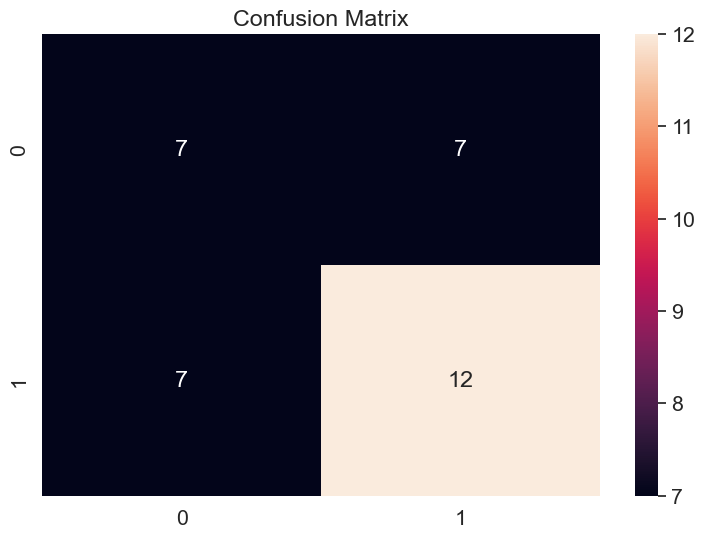

In [20]:
from matplotlib import pyplot as plt

sns.set(font_scale=1.4)
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자